<h1 style="font-size:30px;">Writing Videos</h1>

While building applications that involve video streams, it is often required to write videos. For example, in a surveillance application, you might want to save a video clip as soon as you see something unusual happening. Writing videos can also be useful during the development phase to help debug your code or to create demos of your work. 

In this notebook, we will describe how to save a video in **`avi`** and **`mp4`** formats using openCV. We will also demonstrate how to annotate video frames.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/t7x50ww3ultvwn3/AACnmQGBD7rIbznXzi1sRWJqa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

### <font style="color:rgb(50,120,230)">Preview video</font>

In [2]:
from IPython.display import Video, display

input_video = 'race_car.mp4'

# To display a video from a local file
display(Video(input_video, width=640))

# 1. Read Video from Source

Before we demonstrate how to write a video, we will first need to read a video file into memory so we have a video stream to write. Reading videos requires the creation of a video capture object using the `VideoCapture()` class.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax</font>
```python
VideoCapture object = cv2.VideoCapture(filename[, apiPreference])

```
The function has **1 required argument**:

1. `filename`: Name of the input video file.

There is also another common usage that allows you to specifify an index to access the video stream from a camera mounted to your computer. If you computer has a web camera, then it can be acessed using an index of `0`.
```python
VideoCapture object = cv2.VideoCapture(index[, apiPreference])
```

### <font color="green">OpenCV Documentation</font>


[**`VideoCapture()`**](https://docs.opencv.org/4.5.2/d8/dfe/classcv_1_1VideoCapture.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 1.1 Create the video capture object

In [3]:
source = input_video  # source = 0 for webcam

video_cap = cv2.VideoCapture(source)
if (video_cap.isOpened()== False): 
  print("Error opening video stream or file")

### <font style="color:rgb(50,120,230)">Read and display the first frame of the video</font>

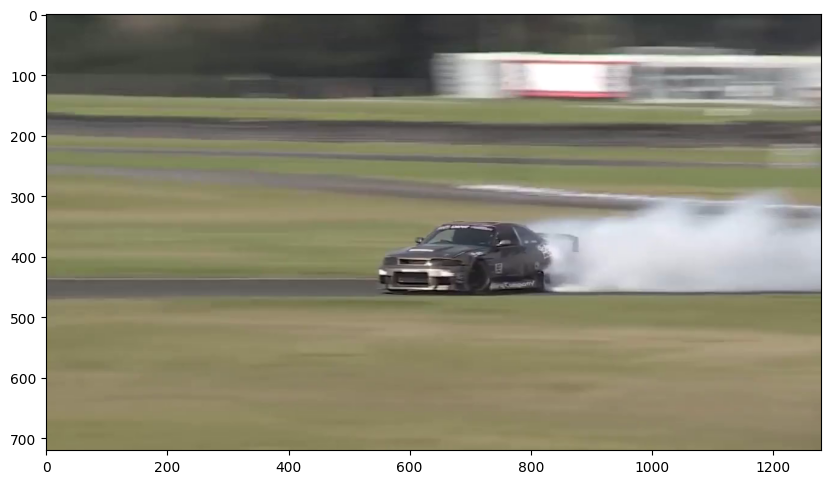

In [4]:
ret, frame = video_cap.read()
plt.figure(figsize = (10, 8))
plt.imshow(frame[...,::-1])
plt.show()

# 2. Writing Videos

Writing videos requires the creation of a video writer object using the `VideoWriter()` class.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax</font>
```python
VideoWriter object = cv2.VideoWriter(filename, fourcc, fps, frameSize[, isColor])
```
The function has **4 required arguments**:

1. `filename`: Name of the output video file.
2. `fourcc`: 4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.
3. `fps`: Framerate of the created video stream.
4. `frameSize`: Size of the video frames.

### <font color="green">OpenCV Documentation</font>


[**`VideoWriter()`**](https://docs.opencv.org/4.5.2/dd/d9e/classcv_1_1VideoWriter.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 2.1 Create the video writer object

In [5]:
# Retrieve video frame properties.
frame_w   = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h   = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_fps = int(video_cap.get(cv2.CAP_PROP_FPS))

# Specify the value for fourcc
# fourcc_avi = cv2.VideoWriter_fourcc('M','J','P','G')
fourcc_mp4 = cv2.VideoWriter_fourcc(*'mp4v')

# Specify the video output filenames.
# file_out_avi = 'video_out.avi'
file_out_mp4 = 'video_out.mp4'

# Slow down the speed of the video.
frame_fps = int(frame_fps/3)

# Create the video writer objects.
# out_avi = cv2.VideoWriter(file_out_avi, fourcc_avi, frame_fps, (frame_w,frame_h))
out_mp4 = cv2.VideoWriter(file_out_mp4, fourcc_mp4, frame_fps, (frame_w,frame_h))

## 2.2 Loop over video frames and write each one to the output file

### <font style="color:rgb(50,120,230)">Convenience function for annotating video frames</font>

In [6]:
def drawBannerText(frame, text, banner_height_percent = 0.05, text_color = (0,255,0)):
    # Draw a black filled banner across the top of the image frame.
    # percent: set the banner height as a percentage of the frame height.
    banner_height = int(banner_height_percent * frame.shape[0])
    cv2.rectangle(frame, (0,0), (frame.shape[1],banner_height), (0,0,0), thickness=-1)
    
    # Draw text on banner.
    left_offset = 20
    location = (left_offset, int( 5 + (banner_height_percent * frame.shape[0])/2 ))
    fontScale = 1.5
    fontThickness = 2
    cv2.putText(frame, text, location, cv2.FONT_HERSHEY_PLAIN, fontScale, text_color, fontThickness, cv2.LINE_AA)

### <font style="color:rgb(50,120,230)">Process video frames</font>

In [7]:
# Read all the frames in the video.
frame_count = 0
while True:
  
    # Read one frame at a time.
    ok, frame = video_cap.read()
    if not ok:
        break

    # Increment the frame count for the annotation.
    frame_count += 1
  
    # Annotate each video frame.
    drawBannerText(frame, 'Frame: ' + str(int(frame_count)) + ' FPS: ' + str(int(frame_fps)))
    
    # Write the frame to the output files.
    # out_avi.write(frame)
    out_mp4.write(frame)

### <font style="color:rgb(50,120,230)">Release the video capture and video writer objects</font>

In [8]:
# Release the VideoCapture and VideoWriter objects
video_cap.release()
# out_avi.release()
out_mp4.release()

# 3. Load the newly created video to confirm creation

### 3.1 Install FFmpeg to Display the final Video

### For Ubuntu/Linux

1. **Update the Package List:**
   ```bash
   sudo apt update
   ```

2. **Install FFmpeg:**
   ```bash
   sudo apt install ffmpeg
   ```

3. **Verify the Installation:**
   ```bash
   ffmpeg -version
   ```

---

### For macOS

1. **Install Homebrew** (if not already installed):
   ```bash
   /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
   ```

2. **Install FFmpeg via Homebrew:**
   ```bash
   brew install ffmpeg
   ```

3. **Verify the Installation:**
   ```bash
   ffmpeg -version
   ```

---

### For Windows

1. **Download FFmpeg**:
   - Visit the [FFmpeg download page](https://ffmpeg.org/download.html).
   - Select a Windows build (e.g., from Gyan.dev).

2. **Extract and Configure FFmpeg**:
   - Extract the downloaded ZIP file to a folder (e.g., `C:\ffmpeg`).

3. **Add FFmpeg to PATH**:
   - Open **System Properties** → **Advanced** → **Environment Variables**.
   - Find the `Path` variable under **System Variables** → Click **Edit**.
   - Add the path to the `bin` folder inside the extracted FFmpeg folder (e.g., `C:\ffmpeg\bin`).

4. **Verify the Installation**:
   - Open Command Prompt and run:
     ```bash
     ffmpeg -version
     ```

---

### For Python Users

If you want to use FFmpeg within Python scripts, you can install a wrapper library like `imageio-ffmpeg` or `ffmpeg-python`:

1. **Install the Wrapper Library**:
   ```bash
   pip install imageio[ffmpeg]
   ```

2. **Use FFmpeg in Python**:
   Now you can use `FFmpeg` commands programmatically through the wrapper library.

### 3.2 Run FFmpeg to covert the video codec to load the video in Jupyter

In [12]:
import subprocess

# Define the FFMPEG command
command = [
    "ffmpeg", 
    "-i", "video_out.mp4", 
    "-vcodec", "libx264", 
    "-acodec", "aac", 
    "converted.mp4"
]

# Run the command
subprocess.run(command, check=True)

FileNotFoundError: [WinError 2] The system cannot find the file specified

### 3.3 Load the converted Video

In [10]:
from IPython.display import Video, display

output_video = 'converted.mp4'

# To display a video from a local file
display(Video(output_video, width=640))

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')